In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy.spatial import distance
import mpld3
import re
#%matplotlib inline

In [2]:
#This programm labels the positions for every pose in the octree files

folder = sorted(glob.glob('/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/modelo14/nbv/*'))
output_folder = "/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/dataset/14/"
numpy_file = "/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/dataset/"
output_dataset = "/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/dataset/dataset_model14"

## loads the points of a sphere to make assign groups in the classification process
reference_points = np.genfromtxt('points_in_sphere.txt')
x = reference_points[:,0]
y = reference_points[:,1]
z = reference_points[:,2]

##octree configuration parameters 
min_octrees_file = -0.106558  #object capsule param from partialModelCofig file
max_octrees_file = 0.106558
min_cubo = 0
max_cubo = 32

m = (max_cubo - min_cubo) / (max_octrees_file - min_octrees_file)
output_cube_size = 32*32*32

##

In [3]:
## start the iterations over all the folders contained in the input folder
pos_indice = 0
folder_indice = 0
dataset = []
i_modulo = 0
for folders in folder:
    #if i_modulo ==10:
    #if i_modulo % 50 == 0:
    number = re.search('modelo14/nbv/(.+)', folders)
    #print(number.group(1))
    #print ( folders, i_modulo)
    sub_folder = sorted(glob.glob(folders + '/octo_acum/*'))
    num_files =	int(len(sub_folder)/3) 
    ## all the octrees files are examined
    for file_ in range(num_files):
        file_ = file_ + 1

        ### processing steps for the octree files
        octree_file = np.loadtxt(folders + '/octo_acum/octomap_acum_' + str(file_) + '.txt', dtype = float) ## the current octree file is loaded in octree_file
        x = octree_file[:,0]
        y = octree_file[:,1]
        z = octree_file[:,2]
        v = octree_file[:,3]
        output_cube = np.zeros((32,32,32))
        ##### the cube of the octree of size 32x32x32 is obtained
        for i in range(output_cube_size):
            x_cube = int((x[i]*m*2+32)/2)
            y_cube = int((y[i]*m*2+32)/2)
            z_cube = int((z[i]*m*2+32)/2)
            output_cube[x_cube][y_cube][z_cube] = v[i]
        ##### flatten representation of the cube is obtained
        flatten_cube = output_cube.reshape(32*32*32,1)
        ##### the first term of the tuple is saved in tuple_first
        tuple_first = output_cube

        ### processing steps for the position, one hot enconding is obtained
        num_point = 0
        min_distance = 1
        pos_file = np.genfromtxt(folders + "/poses/pose_orientation/pose_orn" + str(file_) + ".dat")
        pos_coord = pos_file[0]	
        #print(pos_coord)
        ###### the current pose is compared with all the points in the sphere
        for points in reference_points:
            distance_ = distance.euclidean(points, pos_coord)
            if (distance_ < min_distance):
                min_distance = distance_
                pos_indice = num_point
            num_point = num_point + 1
        ######### one hot encoding is created
        clase = np.zeros((1,20))
        clase[0,pos_indice] = 1

        ##### flatten representation of the cube is saved in the location dst
        ##### location/class_folder_iteration.txt
        dst = output_folder + str(pos_indice) + "_" + str(int(number.group(1))) + "_"  + str(file_) + "_14" + ".txt"
        np.savetxt(dst, flatten_cube, fmt='%f')
        #print octree_file
        #print dst
        dataset.append([tuple_first, clase])
        #stop = stop + 1

    folder_indice = folder_indice + 5
    i_modulo = i_modulo + 5

#np.save(output_dataset, dataset)

(32, 32, 32)


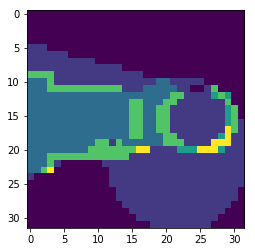

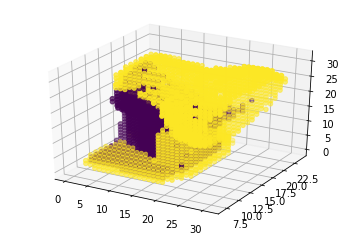

In [15]:
#### visualize a txt file or an element from the npy file

b = np.loadtxt(output_folder + "3_10_2_14.txt", dtype = float)
#####inputs#########
b = b.reshape(32,32,32)
print (b.shape)
x_new = []
y_new = []
z_new = []
val = []
plt.imshow(b[:][:][15])
plt.show()
#mpld3.display()

for i in range(32):
    for j in range(32):
        for k in range(32):
            if b[i][j][k] >= 0.5 and b[i][j][k] < 0.6:
                x_new.append(i)
                y_new.append(j)
                z_new.append(k)
                val.append(0)
            elif b[i][j][k] >= 0.6:
                x_new.append(i)
                y_new.append(j)
                z_new.append(k)
                val.append(255)
                
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_new,y_new,z_new, c = val)
plt.show()    


#c = np.load("/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/dataset/dataset_model1.npy")
#print (c[0][1])



